# Exploratory Data Analysis of Book Prices by Genre

**This project analyzes book prices by genre using a dataset of bestsellers. It includes an examination of the distribution of Fiction and Non-Fiction books, price variations, and visualizations to illustrate key patterns.**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

file_path = "bestsellers with categories.csv"
df = pd.read_csv(file_path)

In [3]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


# Ratio fiction and non fiction books

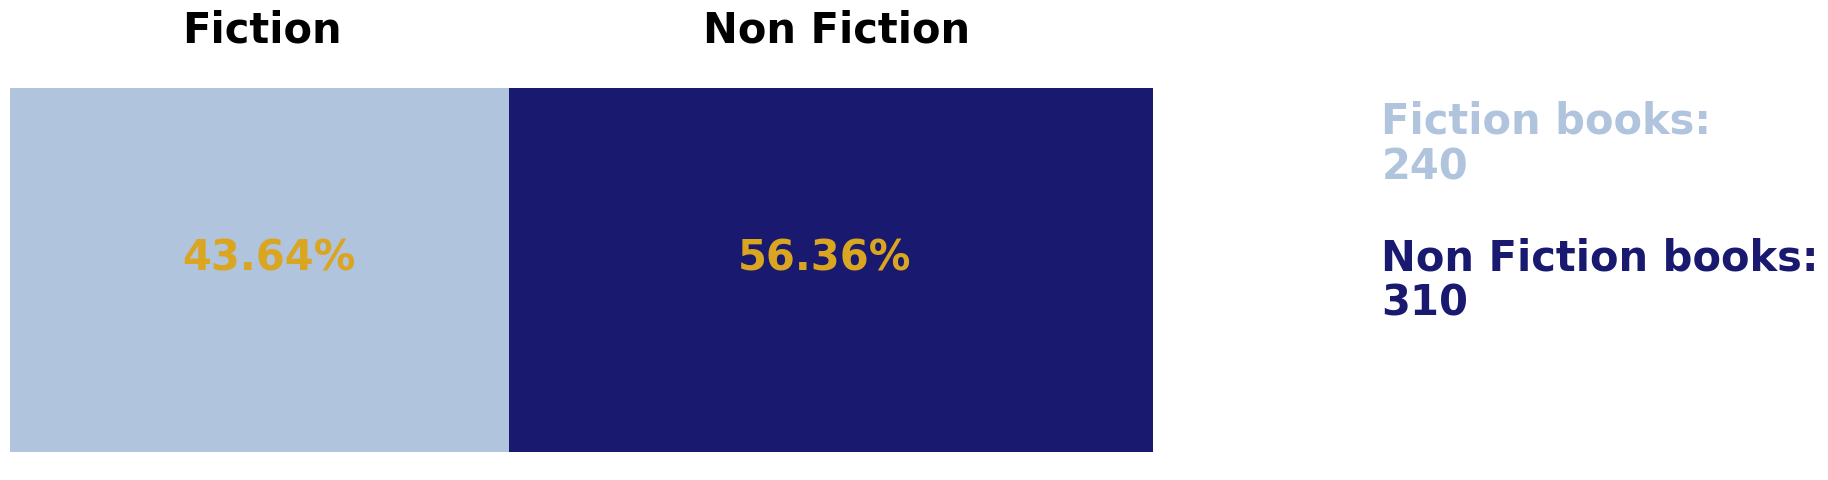

In [7]:
# group by genre
group_genre = df.groupby('Genre')['Name'].count().reset_index()
group_genre.rename(columns={'Name':'Count'}, inplace=True)
group_genre['Percentage'] = round(group_genre['Count']/sum(group_genre['Count'])*100,2)

fig = plt.figure(figsize=(12,4))
axes1 = fig.add_axes([0,0,1,1])

axes1.barh(width=group_genre['Percentage'][0]+group_genre['Percentage'][1], y=0, color='MidnightBlue')
axes1.barh(width=group_genre['Percentage'][0], y=0, color='LightSteelBlue')

axes1.text(group_genre['Percentage'][0]/2.9, 0, f"{group_genre['Percentage'][0]}%", color='Goldenrod', fontsize=30, fontweight='bold')
axes1.text((group_genre['Percentage'][0]+group_genre['Percentage'][1])/1.57, 0, f"{group_genre['Percentage'][1]}%", color='Goldenrod', fontsize=30, fontweight='bold')

axes1.text(120, 0.3, 'Fiction books:', fontsize=30, fontweight='bold', color='LightSteelBlue')
axes1.text(120, 0.2, f"{group_genre['Count'][0]}", fontsize=30, fontweight='bold', color='LightSteelBlue')
axes1.text(120, 0, 'Non Fiction books:', fontsize=30, fontweight='bold', color='MidnightBlue')
axes1.text(120, -0.1, f"{group_genre['Count'][1]}", fontsize=30, fontweight='bold', color='MidnightBlue')

axes1.text(group_genre['Percentage'][0]/2.9, 0.5, f"{group_genre['Genre'][0]}", color='Black', fontsize=30, fontweight='bold')
axes1.text((group_genre['Percentage'][0]+group_genre['Percentage'][1])/1.65, 0.5, f"{group_genre['Genre'][1]}", color='Black', fontsize=30, fontweight='bold')

axes1.axis('off')
fig.show()

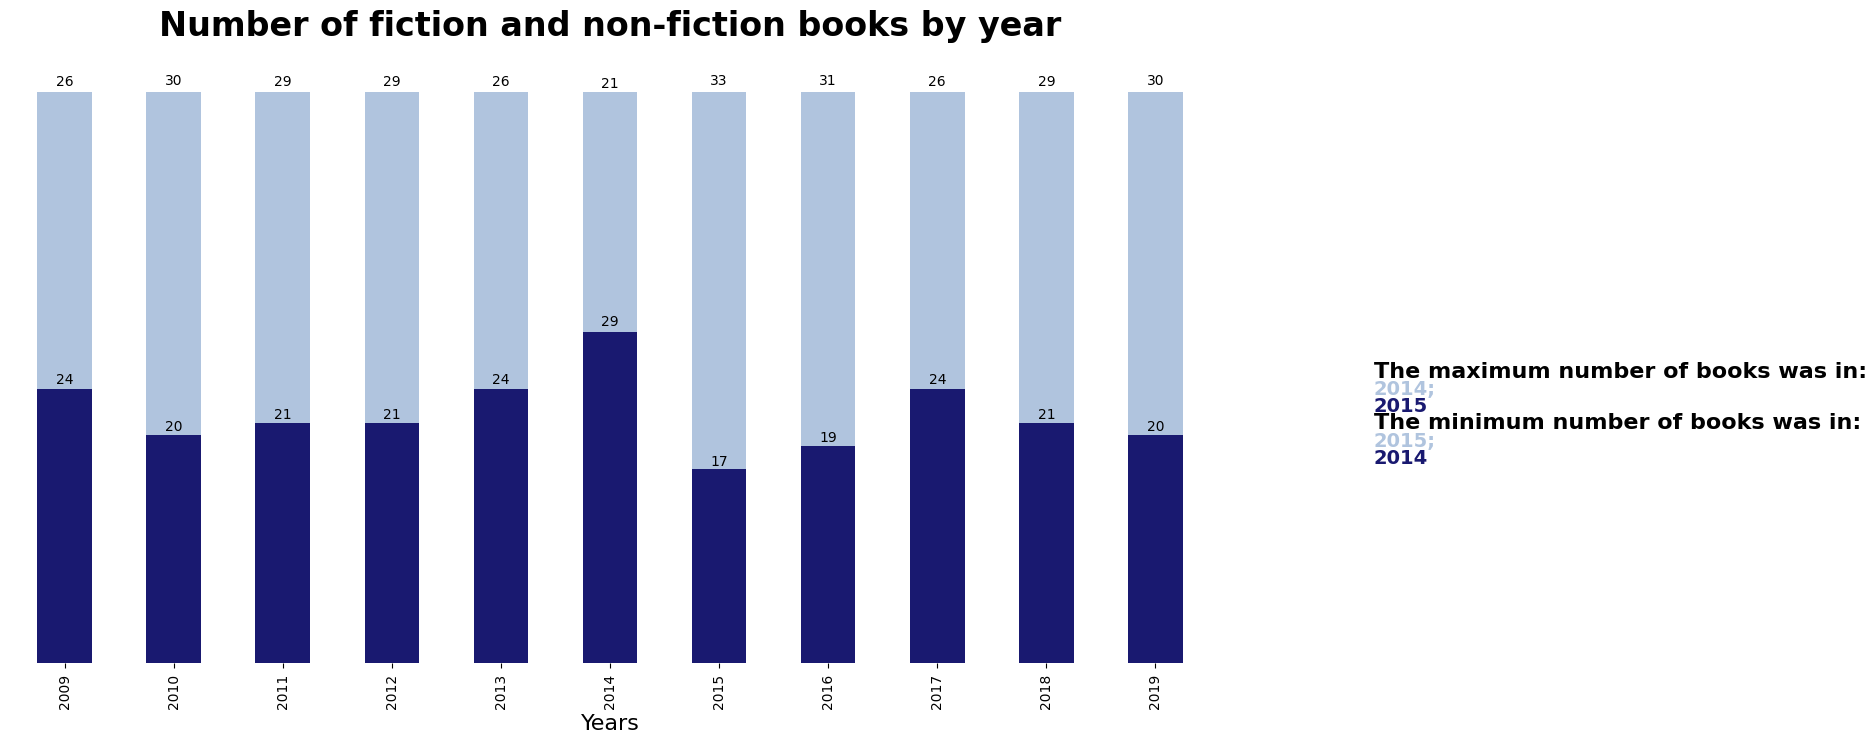

In [17]:
fig = plt.figure(figsize=(12, 6))
axes = fig.add_axes([0, 0, 1, 1])

year_genre_counts = df.groupby(["Year", "Genre"]).size().unstack()

year_genre_counts.plot(kind="bar", stacked=True, color=['MidnightBlue', 'LightSteelBlue'], ax=axes)

axes.spines[['right', 'top', 'left', 'bottom']].set_visible(False)
axes.set_yticks([])
axes.legend().remove()

for p in axes.patches:
    height = p.get_height()
    if height > 0:
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + height * 1.02
        axes.annotate(f'{int(height)}', (x, y), ha='center')

axes.set_xlabel('Years', fontsize=16, color='black')
axes.set_ylabel('')

axes.set_title('Number of fiction and non-fiction books by year', fontsize=24, fontweight='bold', color='black', pad=20)

axes.text(12, 25, 'The maximum number of books was in:', fontsize=16, color='black', fontweight='bold')
axes.text(12, 23.5, '2014;', fontsize=14, color='LightSteelBlue', fontweight='bold')
axes.text(12, 22, '2015', fontsize=14, color='MidnightBlue', fontweight='bold')
axes.text(12, 20.5, 'The minimum number of books was in:', fontsize=16, color='black', fontweight='bold')
axes.text(12, 19, '2015;', fontsize=14, color='LightSteelBlue', fontweight='bold')
axes.text(12, 17.5, '2014', fontsize=14, color='MidnightBlue', fontweight='bold')

plt.show()

# Price by genre

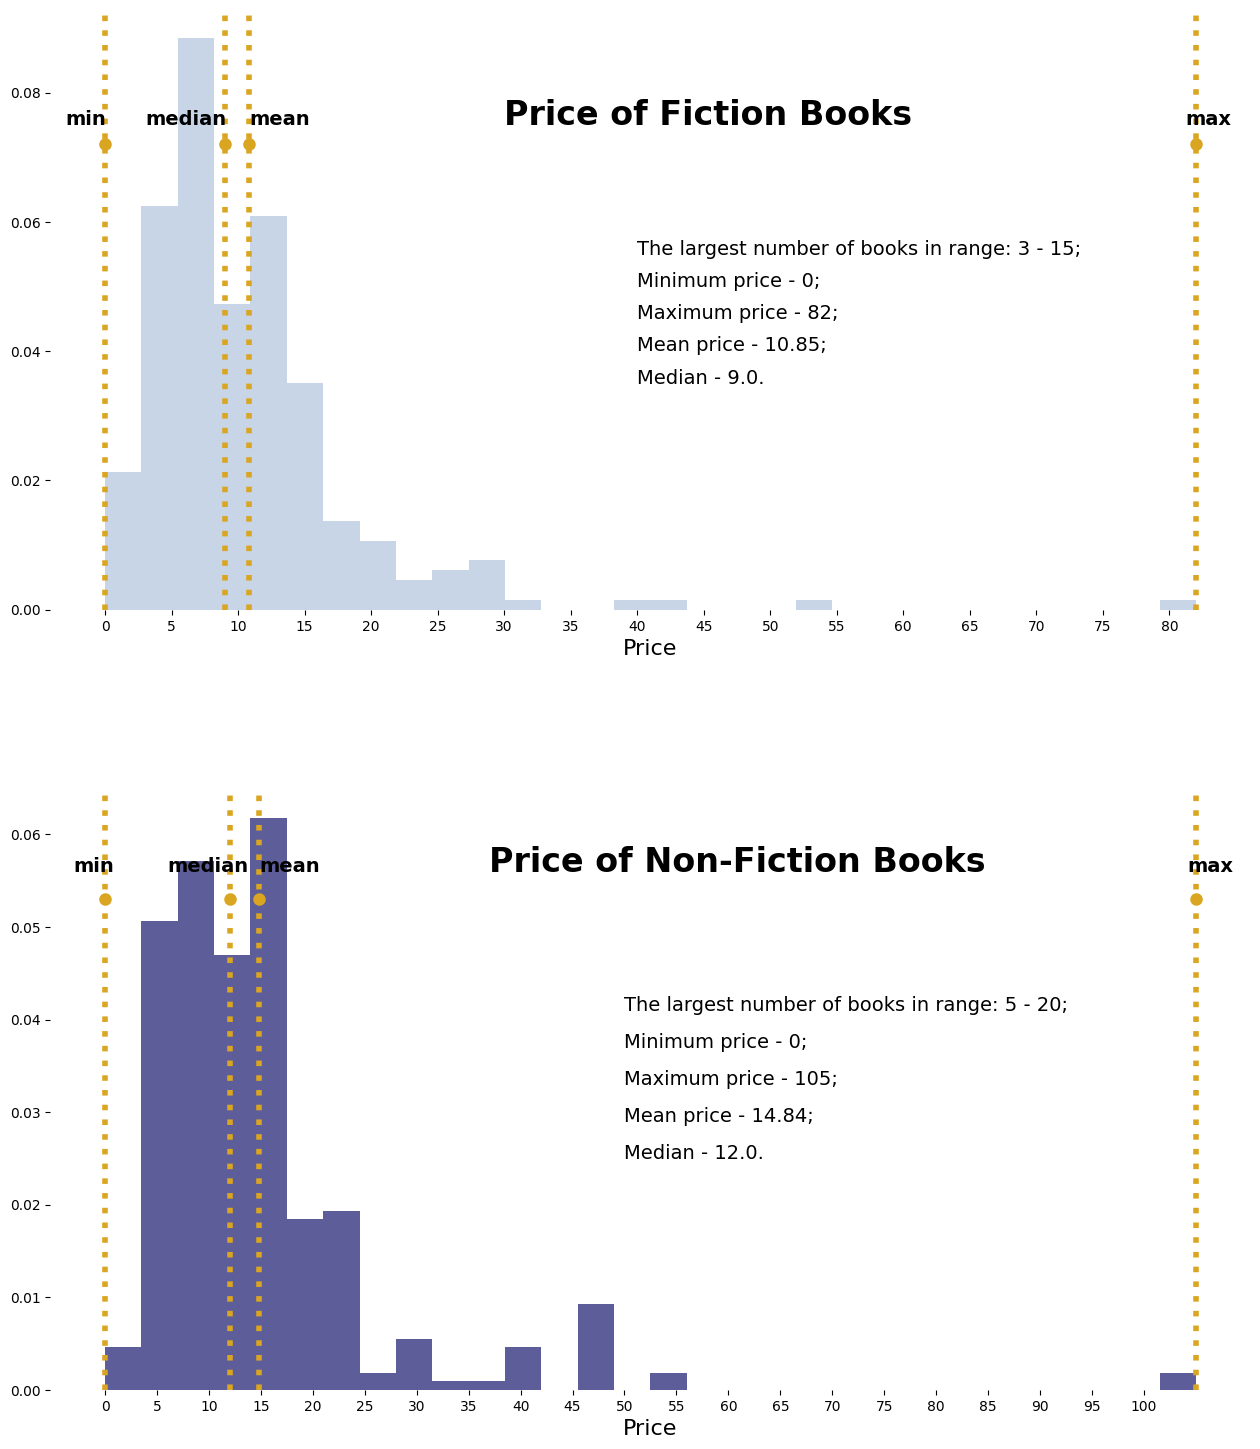

In [18]:
fig = plt.figure(figsize=(12, 6))

axes1 = fig.add_axes([0, 0, 1, 1])
axes2 = fig.add_axes([0, -1.3, 1, 1])

fiction_prices = df[df['Genre'] == 'Fiction']['Price']
non_fiction_prices = df[df['Genre'] == 'Non Fiction']['Price']

# KDE approximation using hist with density=True
axes1.hist(fiction_prices, bins=30, color='LightSteelBlue', alpha=0.7, density=True)
axes2.hist(non_fiction_prices, bins=30, color='MidnightBlue', alpha=0.7, density=True)

for ax, prices, y_val in zip([axes1, axes2], [fiction_prices, non_fiction_prices], [0.072, 0.053]):
    stats = [prices.mean(), prices.median(), prices.max(), prices.min()]
    ax.scatter(stats, [y_val] * 4, color='Goldenrod', lw=3)
    
    ax.axvline(stats[0], linestyle=':', color='Goldenrod', lw=4)
    ax.text(stats[0], y_val + 0.003, 'mean', color='black', fontsize=14, fontweight='bold')
    
    ax.axvline(stats[1], linestyle=':', color='Goldenrod', lw=4)
    ax.text(stats[1] - 6, y_val + 0.003, 'median', color='black', fontsize=14, fontweight='bold')
    
    ax.axvline(stats[3], linestyle=':', color='Goldenrod', lw=4)
    ax.text(stats[3] - 3, y_val + 0.003, 'min', color='black', fontsize=14, fontweight='bold')
    
    ax.axvline(stats[2], linestyle=':', color='Goldenrod', lw=4)
    ax.text(stats[2] - 0.8, y_val + 0.003, 'max', color='black', fontsize=14, fontweight='bold')

for ax in [axes1, axes2]:
    ax.spines[['right', 'top', 'left', 'bottom']].set_visible(False)
    ax.set_xlabel('Price', fontsize=16, color='black')
    ax.set_ylabel('')

axes1.set_xticks(np.arange(fiction_prices.min(), fiction_prices.max(), 5))
axes2.set_xticks(np.arange(non_fiction_prices.min(), non_fiction_prices.max(), 5))

axes1.text(30, 0.075, 'Price of Fiction Books', fontsize=24, color='black', fontweight='bold')
axes2.text(37, 0.056, 'Price of Non-Fiction Books', fontsize=24, color='black', fontweight='bold')

axes1.text(40, 0.055, f'The largest number of books in range: 3 - 15;', color='black', fontsize=14)
axes1.text(40, 0.05, f"Minimum price - {fiction_prices.min()};", color='black', fontsize=14)
axes1.text(40, 0.045, f"Maximum price - {fiction_prices.max()};", color='black', fontsize=14)
axes1.text(40, 0.04, f"Mean price - {fiction_prices.mean():.2f};", color='black', fontsize=14)
axes1.text(40, 0.035, f"Median - {fiction_prices.median()}.", color='black', fontsize=14)

axes2.text(50, 0.041, f'The largest number of books in range: 5 - 20;', color='black', fontsize=14)
axes2.text(50, 0.037, f"Minimum price - {non_fiction_prices.min()};", color='black', fontsize=14)
axes2.text(50, 0.033, f"Maximum price - {non_fiction_prices.max()};", color='black', fontsize=14)
axes2.text(50, 0.029, f"Mean price - {non_fiction_prices.mean():.2f};", color='black', fontsize=14)
axes2.text(50, 0.025, f"Median - {non_fiction_prices.median()}.", color='black', fontsize=14)

plt.show()


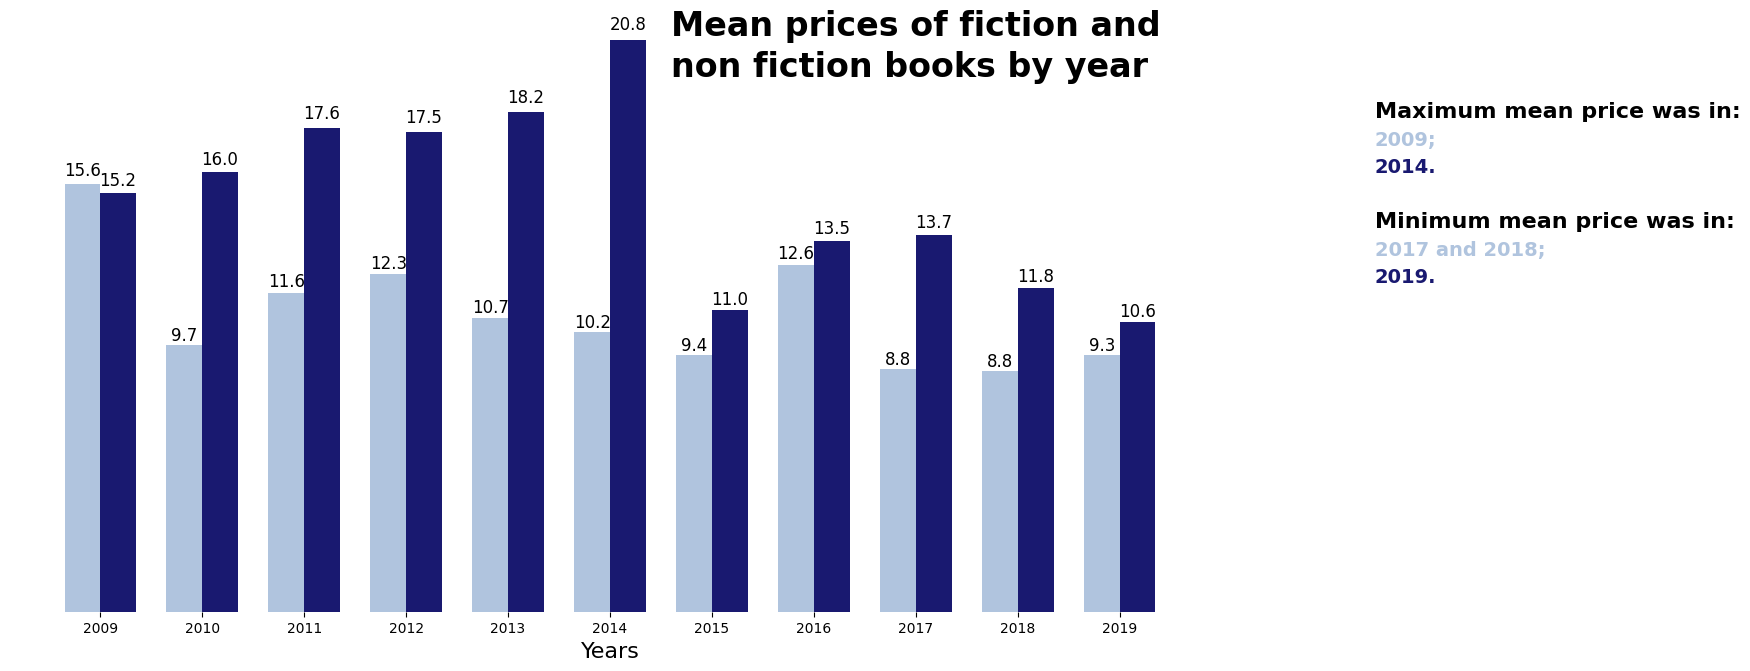

In [13]:
# create list with mean price for fiction and non fiction
mean_price_fiction_books = []
for year in range(2009,2020):
    mean = df[df['Genre']=='Fiction'][df[df['Genre']=='Fiction']['Year']==year]['Price'].mean()
    mean_price_fiction_books.append(mean)
mean_price_non_fiction_books = []
for year in range(2009,2020):
    mean = df[df['Genre']=='Non Fiction'][df[df['Genre']=='Non Fiction']['Year']==year]['Price'].mean()
    mean_price_non_fiction_books.append(mean)
    
years = range(2009,2020, 1)

# create df with years and prices 
mean_price_fiction_books_df = pd.DataFrame({'Year':years, 'Mean_price':mean_price_fiction_books})
mean_price_non_fiction_books_df = pd.DataFrame({'Year':years, 'Mean_price':mean_price_non_fiction_books})

fig = plt.figure(figsize=(12,6))

axes = fig.add_axes([0,0,1,1])

x = np.arange(len(years))
width = 0.35

axes.bar(x - width/2, height=mean_price_fiction_books_df['Mean_price'], color='LightSteelBlue', width=width)
axes.bar(x + width/2, height=mean_price_non_fiction_books_df['Mean_price'], color='Midnightblue', width=width)

axes.set_xticklabels(years)
axes.set_xticks(x)
axes.set_yticks([])

axes.set_xlabel('Years', fontsize=16, color='black')
axes.set_ylabel('')

axes.spines[['right', 'top', 'left', 'bottom']].set_visible(False)

for p in axes.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    axes.annotate('{:.1f}'.format(height), (x + width/2, y + height*1.02), ha='center', fontsize=12, color='black')
    
axes.text(5.6, 21, 'Mean prices of fiction and', color='Black', fontsize=24, fontweight='bold', label='Fiction books')
axes.text(5.6, 19.5, 'non fiction books by year', color='Black', fontsize=24, fontweight='bold', label='Non fiction books')

axes.text(12.5, 18, 'Maximum mean price was in:', fontsize=16, color='black', fontweight='bold')
axes.text(12.5, 17, '2009;', fontsize=14, color='LightSteelBlue', fontweight='bold')
axes.text(12.5, 16, '2014.', fontsize=14, color='MidnightBlue', fontweight='bold')
axes.text(12.5, 14, 'Minimum mean price was in:', fontsize=16, color='black', fontweight='bold')
axes.text(12.5, 13, '2017 and 2018;', fontsize=14, color='LightSteelBlue', fontweight='bold')
axes.text(12.5, 12, '2019.', fontsize=14, color='MidnightBlue', fontweight='bold')

fig.show()

**We observe a strong variability of indicators. The increase and decrease mean price of fiction and non-fiction books does not always occur in the same periods.**

**Mean price of non-scientific books is higher in all years except 2009.**

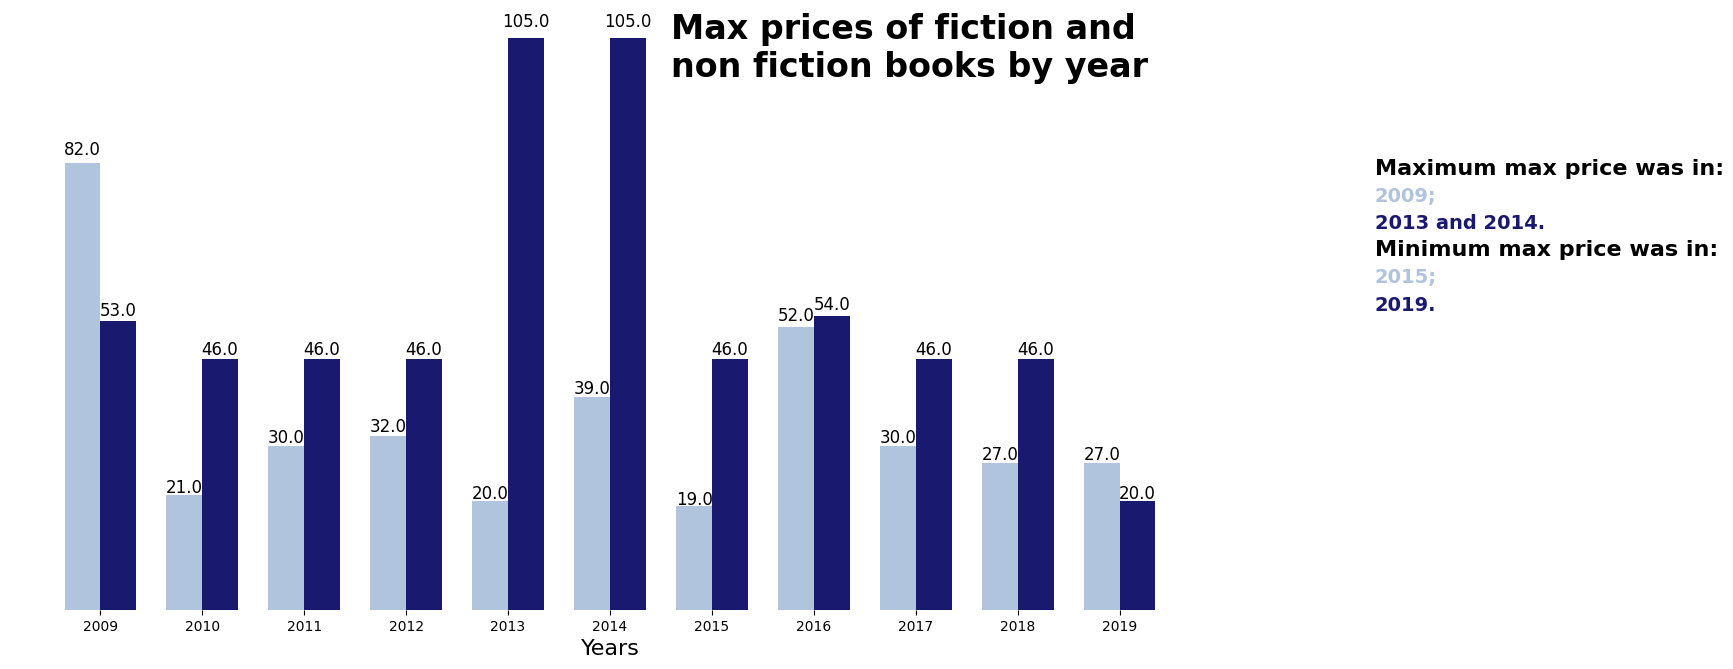

In [14]:
# create list with max price for fiction and non fiction
max_price_fiction_books = []
for year in range(2009,2020):
    max = df[df['Genre']=='Fiction'][df[df['Genre']=='Fiction']['Year']==year]['Price'].max()
    max_price_fiction_books.append(max)
max_price_non_fiction_books = []
for year in range(2009,2020):
    max = df[df['Genre']=='Non Fiction'][df[df['Genre']=='Non Fiction']['Year']==year]['Price'].max()
    max_price_non_fiction_books.append(max)
    

# create df with years and prices 
max_price_fiction_books_df = pd.DataFrame({'Year':years, 'Max_price':max_price_fiction_books})
max_price_non_fiction_books_df = pd.DataFrame({'Year':years, 'Max_price':max_price_non_fiction_books})

fig = plt.figure(figsize=(12,6))

axes = fig.add_axes([0,0,1,1])

x = np.arange(len(years))
width = 0.35

axes.bar(x - width/2, height=max_price_fiction_books_df['Max_price'], color='LightSteelBlue', width=width)
axes.bar(x + width/2, height=max_price_non_fiction_books_df['Max_price'], color='MidnightBlue', width=width)

axes.set_xticklabels(years)
axes.set_xticks(x)
axes.set_yticks([])

axes.set_xlabel('Years', fontsize=16, color='black')
axes.set_ylabel('')

axes.spines[['right', 'top', 'left', 'bottom']].set_visible(False)

for p in axes.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    axes.annotate('{:.1f}'.format(height), (x + width/2, y + height*1.02), ha='center', fontsize=12, color='black')
    
axes.text(5.6, 105, 'Max prices of fiction and', color='Black', fontsize=24, fontweight='bold')
axes.text(5.6, 98, 'non fiction books by year', color='Black', fontsize=24, fontweight='bold')

axes.text(12.5, 80, 'Maximum max price was in:', fontsize=16, color='black', fontweight='bold')
axes.text(12.5, 75, '2009;', fontsize=14, color='LightSteelBlue', fontweight='bold')
axes.text(12.5, 70, '2013 and 2014.', fontsize=14, color='MidnightBlue', fontweight='bold')
axes.text(12.5, 65, 'Minimum max price was in:', fontsize=16, color='black', fontweight='bold')
axes.text(12.5, 60, '2015;', fontsize=14, color='LightSteelBlue', fontweight='bold')
axes.text(12.5, 55, '2019.', fontsize=14, color='MidnightBlue', fontweight='bold')
fig.show()

**We also observe high variability in the indicators.**

**Max price of non fiction books is higher in all years except 2009 and 2019.**

**I want to know more about books with highest price.**

In [14]:
df[df['Genre']=='Fiction'][df[df['Genre']=='Fiction']['Price']==82]

,Name,Author,User Rating,Reviews,Price,Year,Genre
473,The Twilight Saga Collection,Stephenie Meyer,4.7,3801,82,2009,Fiction


**About author**: Stephenie Meyer graduated from Brigham Young University with a degree in English literature, and she lives with her husband and three sons in Arizona.

**About book**: Deeply romantic and extraordinarily suspenseful, Twilight, New Moon, Eclipse, and Breaking Dawn capture the struggle between defying our instincts and satisfying our desires.

**(c) Amazon**

In [15]:
df[df['Genre']=='Non Fiction'][df[df['Genre']=='Non Fiction']['Price']==105]

,Name,Author,User Rating,Reviews,Price,Year,Genre
69,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2013,Non Fiction
70,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2014,Non Fiction


**About author**: The American Psychiatric Association (APA) is the main professional organization of psychiatrists and trainee psychiatrists in the United States, and the largest psychiatric organization in the world.

**(c) Wikipedia**

**About book**: This new edition of Diagnostic and Statistical Manual of Mental Disorders (DSM-5), used by clinicians and researchers to diagnose and classify mental disorders, is the product of more than 10 years of effort by hundreds of international experts in all aspects of mental health. Their dedication and hard work have yielded an authoritative volume that defines and classifies mental disorders in order to improve diagnoses, treatment, and research.

**(c) Amazon**

**And so, analysis shows that price non fiction books > price fiction books.** 

**But I want to know if genre is a statistically significant feature for price. We have a non-normal distribution of data, because I will use Mann-Whitney U test.**

**H0 - The differences are not statistically significant and are random.**

In [4]:
stat, p = stats.mannwhitneyu(df[df['Genre']=='Fiction']['Price'],df[df['Genre']=='Non Fiction']['Price'])
print('p=%.8f' % (p))
print()
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

p=0.00000008

Different distribution (reject H0)


**H0 rejected, and so we can say that genre is statistically significant feature for price. Let's visualize with boxplot price of fiction and non fiction books.**

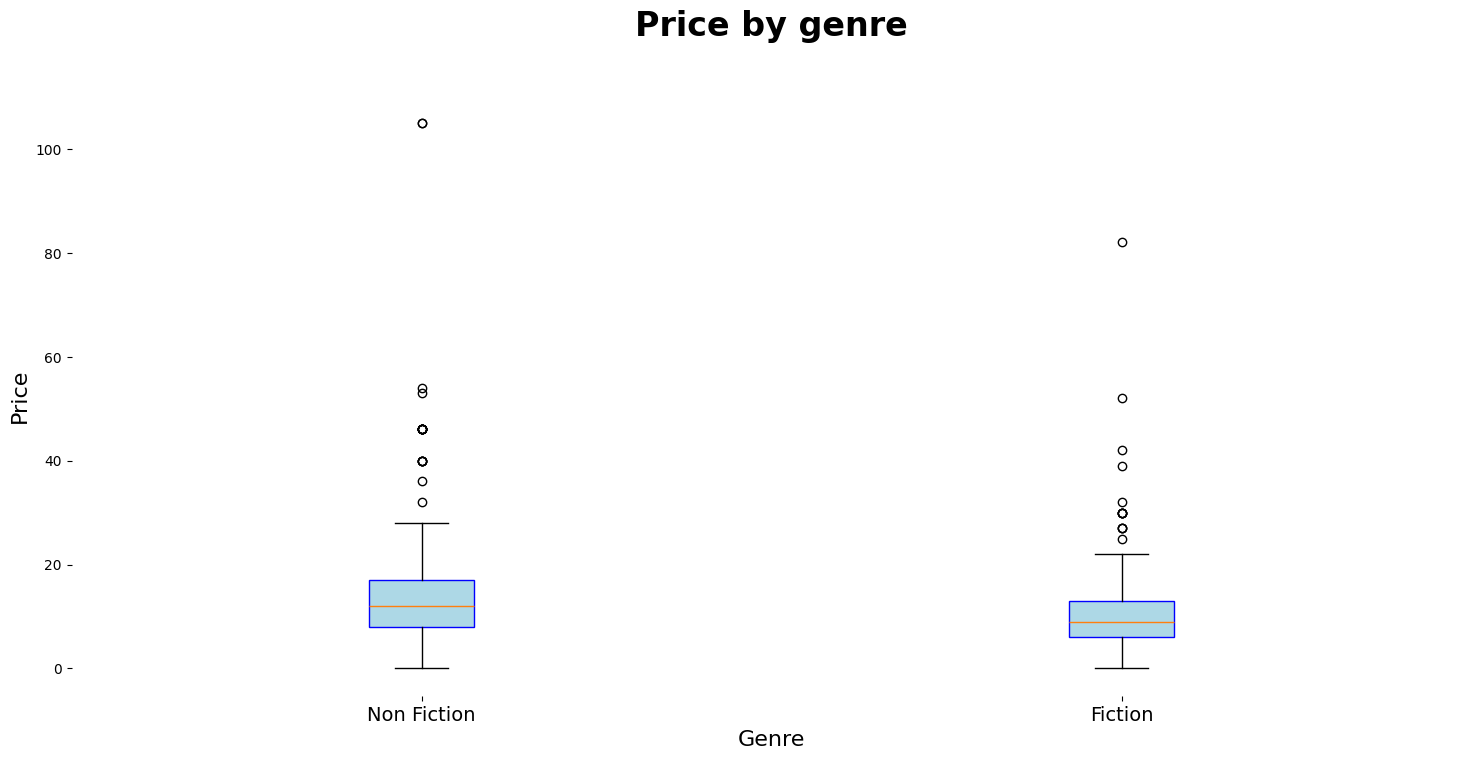

In [7]:
fig = plt.figure(figsize=(14, 6))

axes = fig.add_axes([0, 0, 1, 1])

grouped_data = [df[df['Genre'] == genre]['Price'] for genre in df['Genre'].unique()]

axes.boxplot(grouped_data, patch_artist=True, 
             boxprops=dict(facecolor='lightblue', color='blue'))

axes.set_xticklabels(df['Genre'].unique(), fontsize=14, color='black')
axes.set_xlabel('Genre', fontsize=16, color='black')
axes.set_ylabel('Price', fontsize=16, color='black')

axes.spines[['right', 'top', 'left', 'bottom']].set_visible(False)

axes.text(0.5, 1.1, 'Price by genre', color='black', fontsize=24, fontweight='bold', ha='center', transform=axes.transAxes)

plt.show()

**Boxplot shows the differences between prices of fiction and non fiction books**

**And at the end about price I want to visualize the most expensive books by genre.**

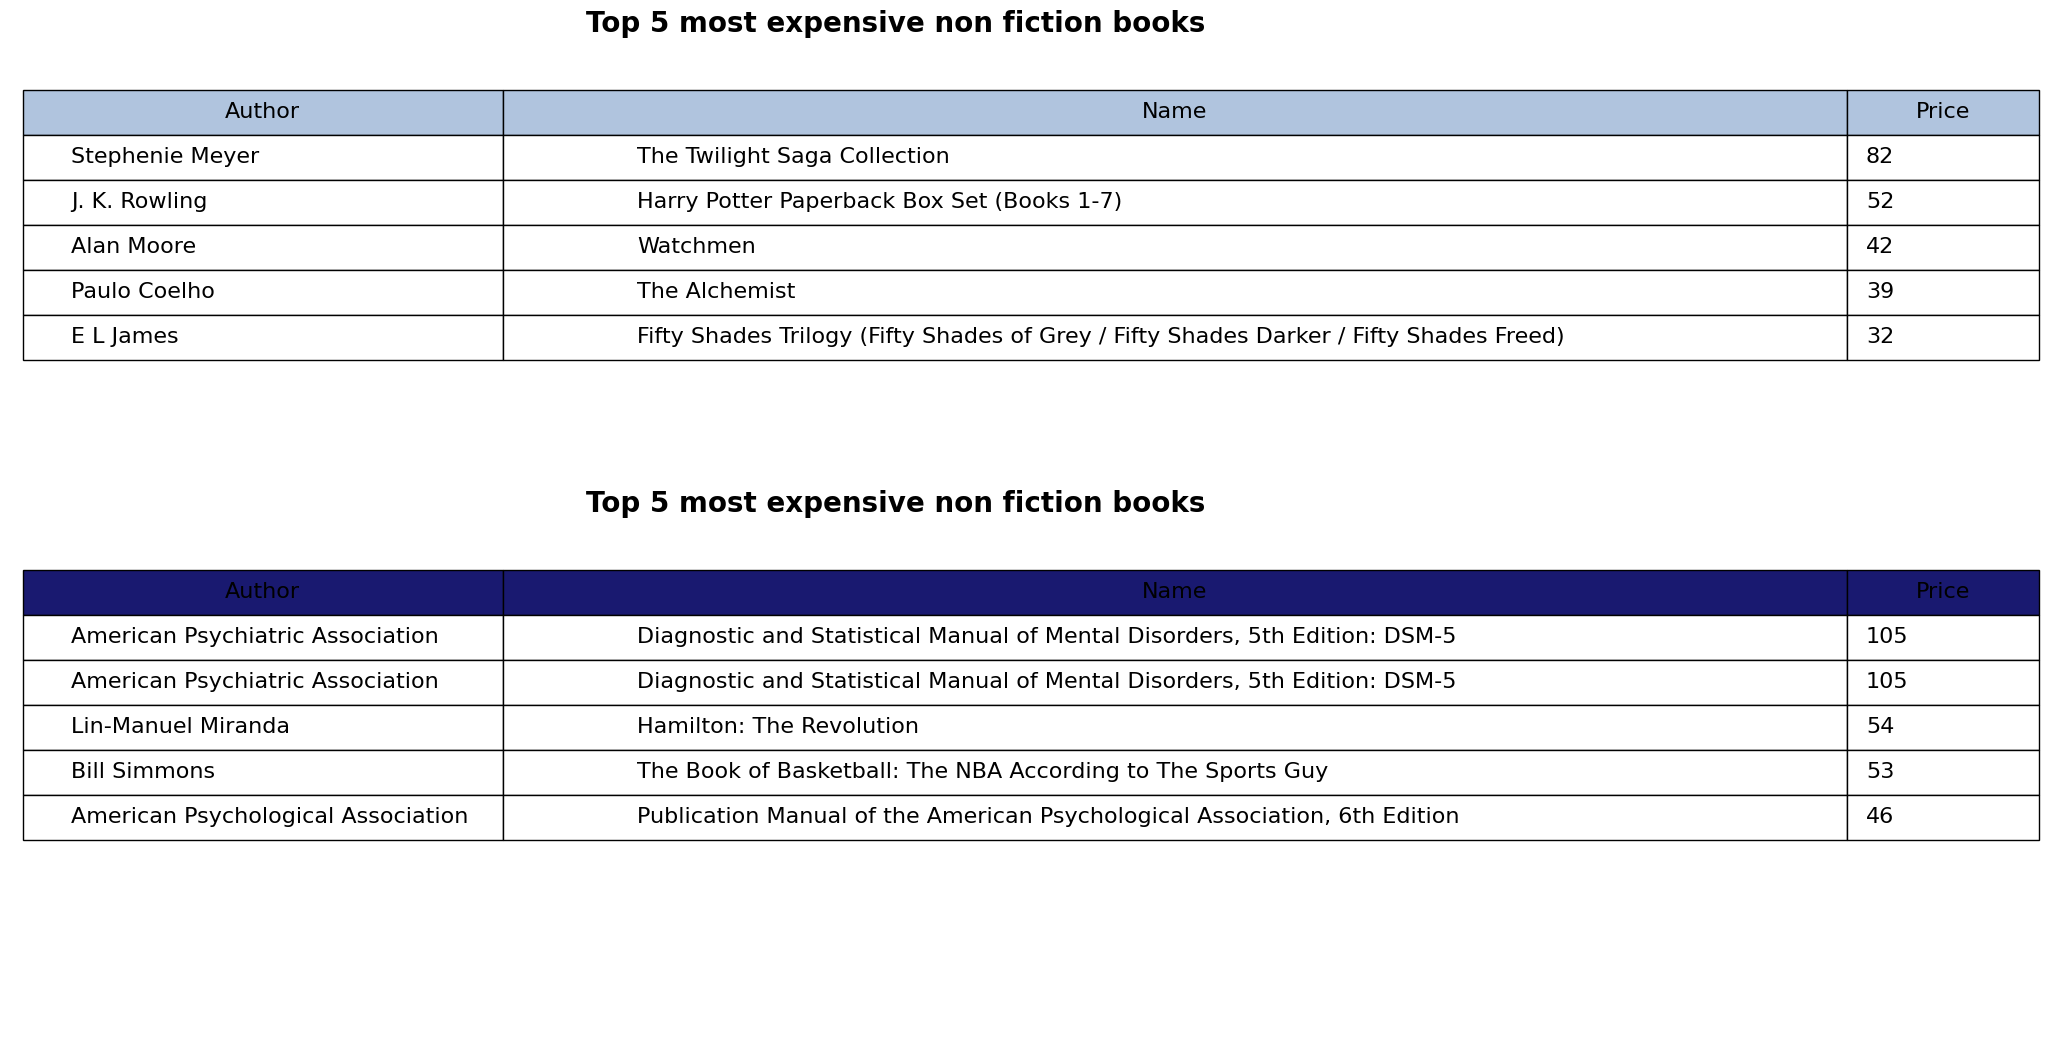

In [13]:
op_fiction = df[df['Genre']=='Fiction'].sort_values(by='Price', ascending=False).head()
top_fiction = top_fiction[['Author', 'Name', 'Price']]
top_fiction.reset_index(inplace=True)
top_fiction.drop('index', inplace=True, axis=1)
top_non_fiction = df[df['Genre']=='Non Fiction'].sort_values(by='Price', ascending=False).head()
top_non_fiction = top_non_fiction[['Author', 'Name', 'Price']]
top_non_fiction.reset_index(inplace=True)
top_non_fiction.drop('index', inplace=True, axis=1)


list_fiction = top_fiction.values.tolist()
list_non_fiction = top_non_fiction.values.tolist()

color_list = [['white', 'white', 'white']] 

fig = plt.figure()

axes1 = fig.add_axes([0, 0, 1, 1]) 
axes2 = fig.add_axes([0, -1, 1, 1]) 

table1=axes1.table(cellColours=color_list*5,cellText = list_fiction, cellLoc ='left', loc ='upper left', colWidths=[0.5,1.4,0.2],
                  colLabels=top_fiction.columns,colColours=['LightSteelBlue']*3)           
table1.auto_set_font_size(False) 
table1.set_fontsize(16)  
table1.scale(1.5, 2.7) 
axes1.text(0.9, 1.1, 'Top 5 most expensive non fiction books', color='black', fontsize=20, fontweight='bold')

table2=axes2.table(cellColours=color_list*5,cellText = list_non_fiction, cellLoc ='left', loc ='upper left', colWidths=[0.5,1.4,0.2],
                  colLabels=top_non_fiction.columns,colColours=['MidnightBlue']*3)           
table2.auto_set_font_size(False) 
table2.set_fontsize(16)  
table2.scale(1.5, 2.7) 
axes2.text(0.9, 1.1, 'Top 5 most expensive non fiction books', color='black', fontsize=20, fontweight='bold')

# axis
axes1.set_axis_off()
axes2.set_axis_off()

plt.show()